In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns_to_normalize = df_market_data.columns

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the data and transform the data
df_market_data[columns_to_normalize] = scaler.fit_transform(df_market_data[columns_to_normalize])


In [6]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(data=df_market_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_scaled_data.index = df_market_data.index

# Display sample data
df_scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(df_scaled_data)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k_values": k_values, "inertia_values": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_data.head()

,k_values,inertia_values
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.220364


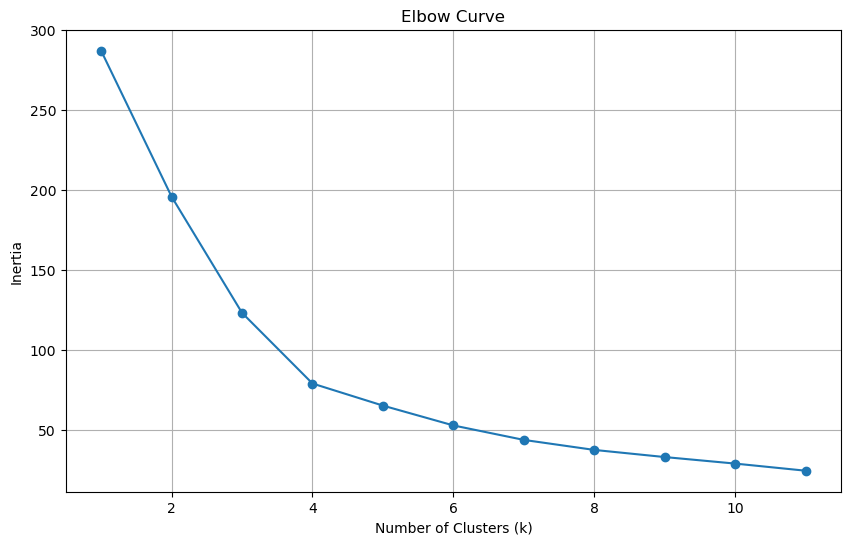

In [11]:
# Plot a line chart with all the inertia values
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df_elbow_data['k_values'], df_elbow_data['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3-4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [13]:
# Initialize the K-Means model using the best value for k
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, random_state=42)

# Fit the K-Means model to the scaled data
kmeans_model.fit(df_scaled_data)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [14]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_scaled_data)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_scaled_data)

# Print the resulting array of cluster values
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [17]:
# Create a copy of the DataFrame
df_copy = df_market_data.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['predicted_cluster'] = cluster_labels

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [19]:
# Importing hvPlot
import hvplot.pandas

# Create scatter plot
scatter_plot = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    cmap="viridis",  # You can choose any colormap you prefer
    hover_cols=["coin_name"],
    width=800,
    height=500,
    title="Cryptocurrency Clusters"
)

# Display the scatter plot
scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance with n_components=3
pca_model = PCA(n_components=3)

In [21]:
# Use the PCA model with fit_transform to reduce to three principal components
pca_transformed_data = pca_model.fit_transform(df_scaled_data)

# Convert the transformed data into a DataFrame
df_pca_transformed = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3'],  # Naming the principal components
    index=df_scaled_data.index  # Keeping the same index as the original data
)

# View the first five rows of the DataFrame
print(df_pca_transformed.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [23]:
# Retrieve the explained variance from the PCA model
explained_variance = pca_model.explained_variance_ratio_

# Print the explained variance for each principal component
for i, ev in enumerate(explained_variance):
    print(f"Explained variance for PC{i+1}: {ev:.2f}")



Explained variance for PC1: 0.37
Explained variance for PC2: 0.35
Explained variance for PC3: 0.18


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [24]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_transformed_data,
    columns=['PC1', 'PC2', 'PC3'],  # Naming the principal components
    index=df_scaled_data.index  # Keeping the same index as the original data
)

# Copy the crypto names from the original data
crypto_names = df_market_data.index.tolist()

# Set the coinid column as index
df_pca.index = df_market_data.index

# Display sample data
print(df_pca.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [25]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [26]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model_pca = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model_pca.fit(df_pca)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_model_pca.inertia_)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k_values": k_values, "inertia_values": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_data_pca.head()


,k_values,inertia_values
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747


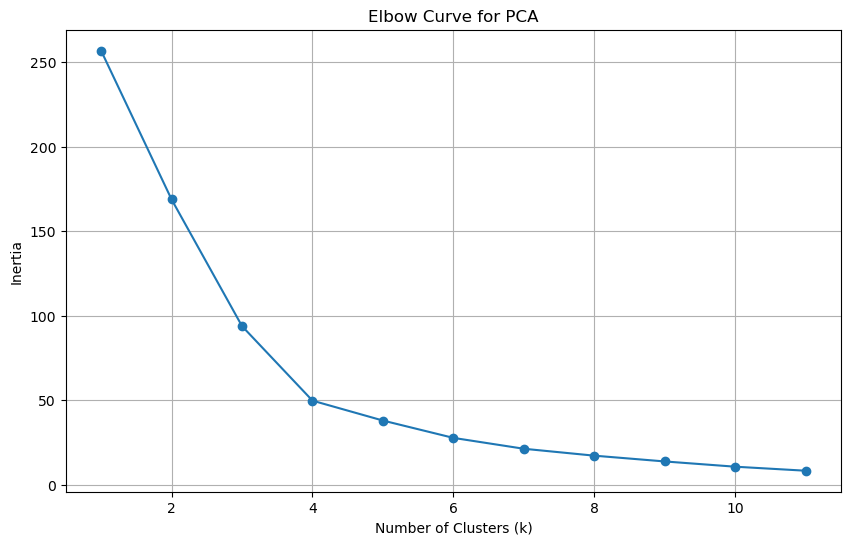

In [28]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_data_pca['k_values'], df_elbow_data_pca['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Curve for PCA')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [29]:
# Initialize the K-Means model using the best value for k
best_k_pca = 4  

# Initialize the K-Means model using the best value for k
kmeans_model_pca = KMeans(n_clusters=best_k_pca, random_state=42)


In [30]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(df_pca)


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [31]:
# Predict the clusters
cluster_labels_pca = kmeans_model_pca.predict(df_pca)

# Print the resulting array of cluster values
print(cluster_labels_pca)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [32]:
# Create a copy of the DataFrame with the PCA data
df_pca_copy = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_labels_pca

# Display sample data
print(df_pca_copy.head())


                   PC1       PC2       PC3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        3
ethereum     -0.458261  0.458466  0.952877        3
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        3


In [33]:
import hvplot.pandas

# Create the scatter plot
scatter_plot = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["CoinName"],
    legend="top_right"
)

# Display the scatter plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

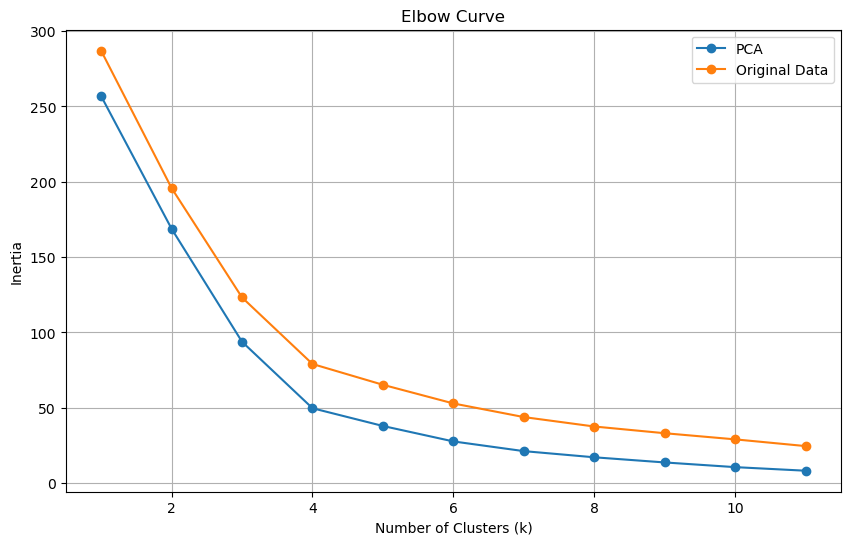

In [36]:
import matplotlib.pyplot as plt

# Plot a line chart with all the inertia values for both PCA and original data
plt.figure(figsize=(10, 6))

# Plot for PCA
plt.plot(df_elbow_data_pca['k_values'], df_elbow_data_pca['inertia_values'], marker='o', linestyle='-', label='PCA')

# Plot for original data
plt.plot(df_elbow_data['k_values'], df_elbow_data['inertia_values'], marker='o', linestyle='-', label='Original Data')

plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.legend()
plt.show()


In [39]:
# Importing hvPlot
import hvplot.pandas

# Scatter plot for PCA data
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["CoinName"],
    legend="top_right",
    title="PCA Cryptocurrency Clusters"
)

# Scatter plot for original data
scatter_plot_original = df_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="predicted_cluster",
    cmap="viridis",  # You can choose any colormap you prefer
    hover_cols=["coin_name"],
    width=800,
    height=500,
    title="Original Cryptocurrency Clusters"
)

# Composite plot of the two scatter plots
composite_plot = scatter_plot_pca + scatter_plot_original

# Display the composite plot
composite_plot


:Layout
   .NdOverlay.I :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2)
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_cluster)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** With fewer features, the clusters are more compact and well-defined. However, the trade-off is that using fewer features might result in less accurate clustering and may overlook important patterns in the data. Additionally, using fewer features reduces the dimensionality of the data, making it easier to visualize and interpret the clustering results.